# STADS Machine Learning Kurs
## Workshop 1 : Introduction to ML

### What is Machine Learning?

Automate decision-making processes using generalizable insights from sample data.

"Machine Learning is the field of study that gives computers the ability to learn without being explicitly programmed."
– Arthur Samuel, 1959




### Common use cases

**Spam detection** - Decide if a text (email) is spam or not.
- In the past, Support Vector Machines were commonly used.
- Today neural networks are usally used

**Face recognition** - Usually neural networks are used for this task.

 

**Real estate price forecast**

Prediction of the selling price of a house based on some characteristics
- In the following example there is "only" one characteristic: size of the house



### Machine Learning Types

### Supervised Machine Learning

The model requires, besides the input vector X, the "true" output y (the so-called label).


The model thus approximates the relation between X and y as accurately as possible and provides information about a given X.


**Regression**

- Predicting the value of a particular continuous variable based on the values of other variables, assuming a linear or nonlinear model of the
Dependency
- E.g. predicting the price of a house, predicting the amount of sales, predicting the temperature of the weather

Sample algorithms
- Linear regression

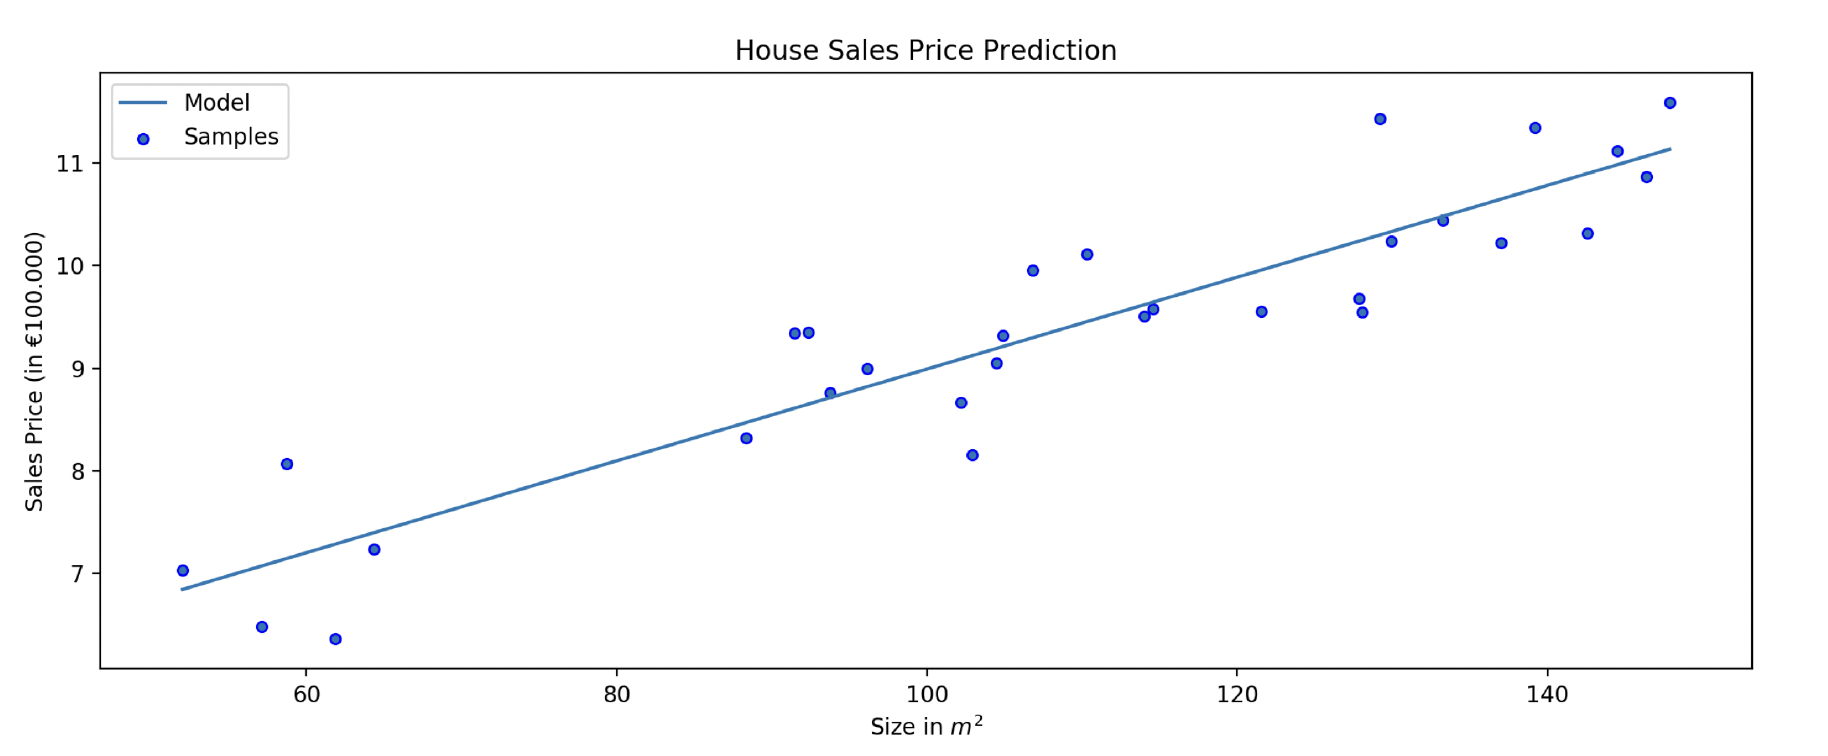

Linear regression is a parametric model that assumes that: $y(x) =  \sum \limits _{j=1} ^{D}w_{j} x_{j} + \epsilon $. \
where $x_1,...,x_D$ are the features/regressors of the model.

- Polynomial Regression

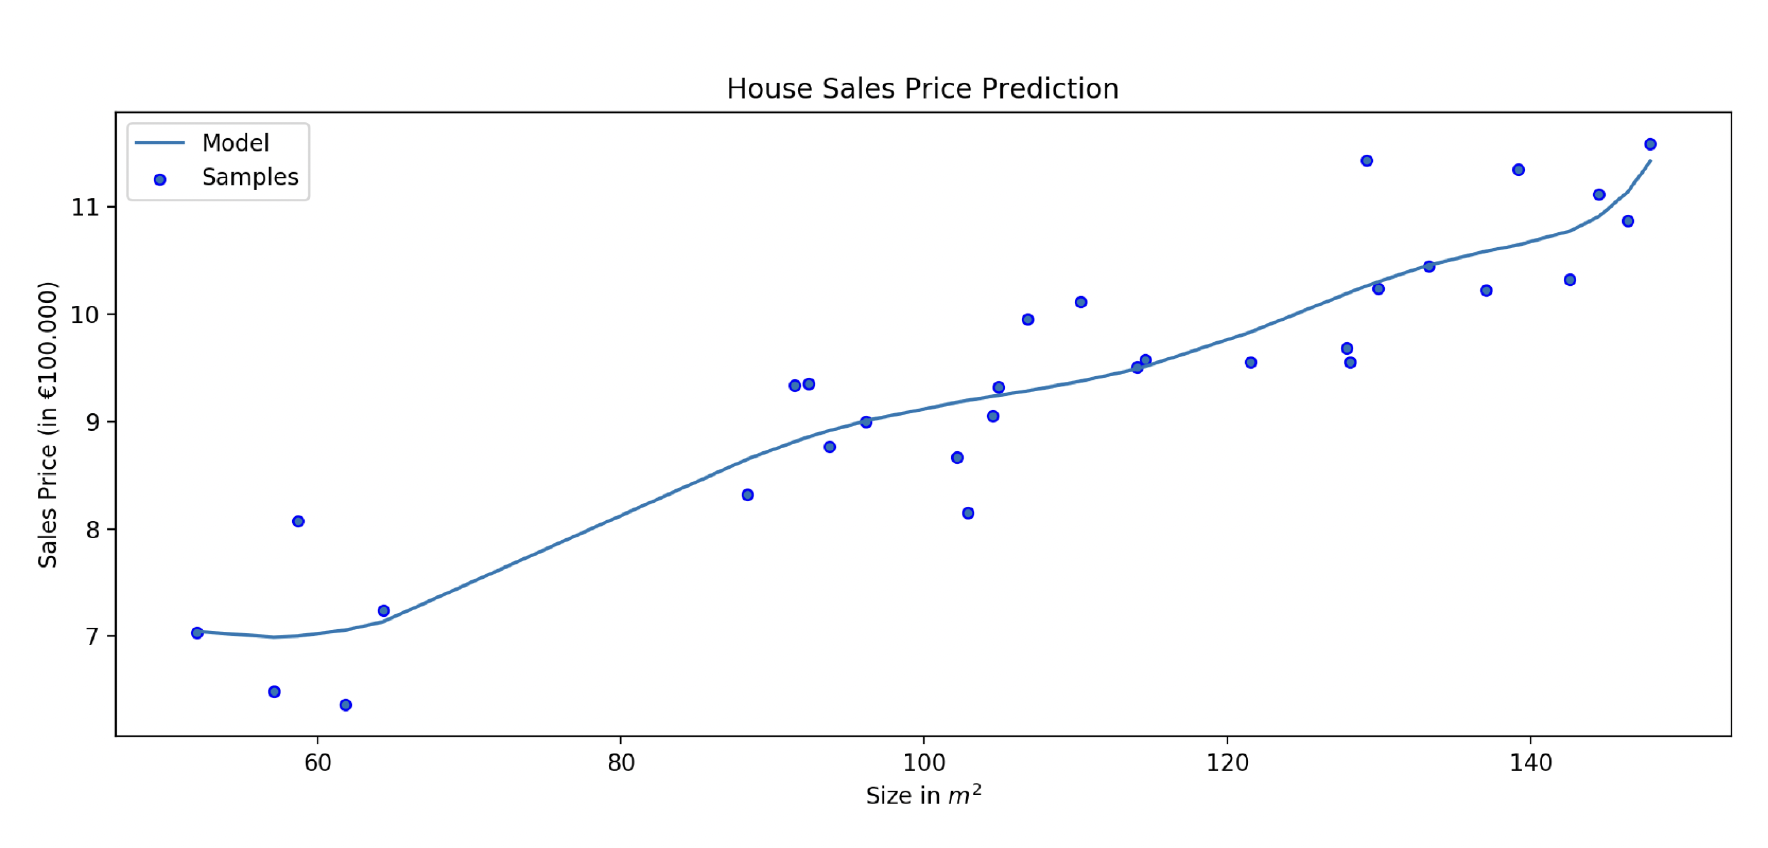


Polynomial regression is a parametric model that assumes that: $y(x) =  \sum \limits _{j=1} ^{D}w_{j} \phi_j(x_{j}) + \epsilon $. \
Here $\phi_j$ is a particular polynomial, which is applied on $x_j$ .

**Classification**
- Search for a model for a class attribute depending on other attributes.
- y are categorical values (no continuous values!).
E.g. spam mail detection, credit assessment


Sample Algorithms:
-  logistic Regression




In logistic regression, y-values are calculated exactly as in classical regression. At the end, however, it is classified whether the output belongs to the first or the second class.

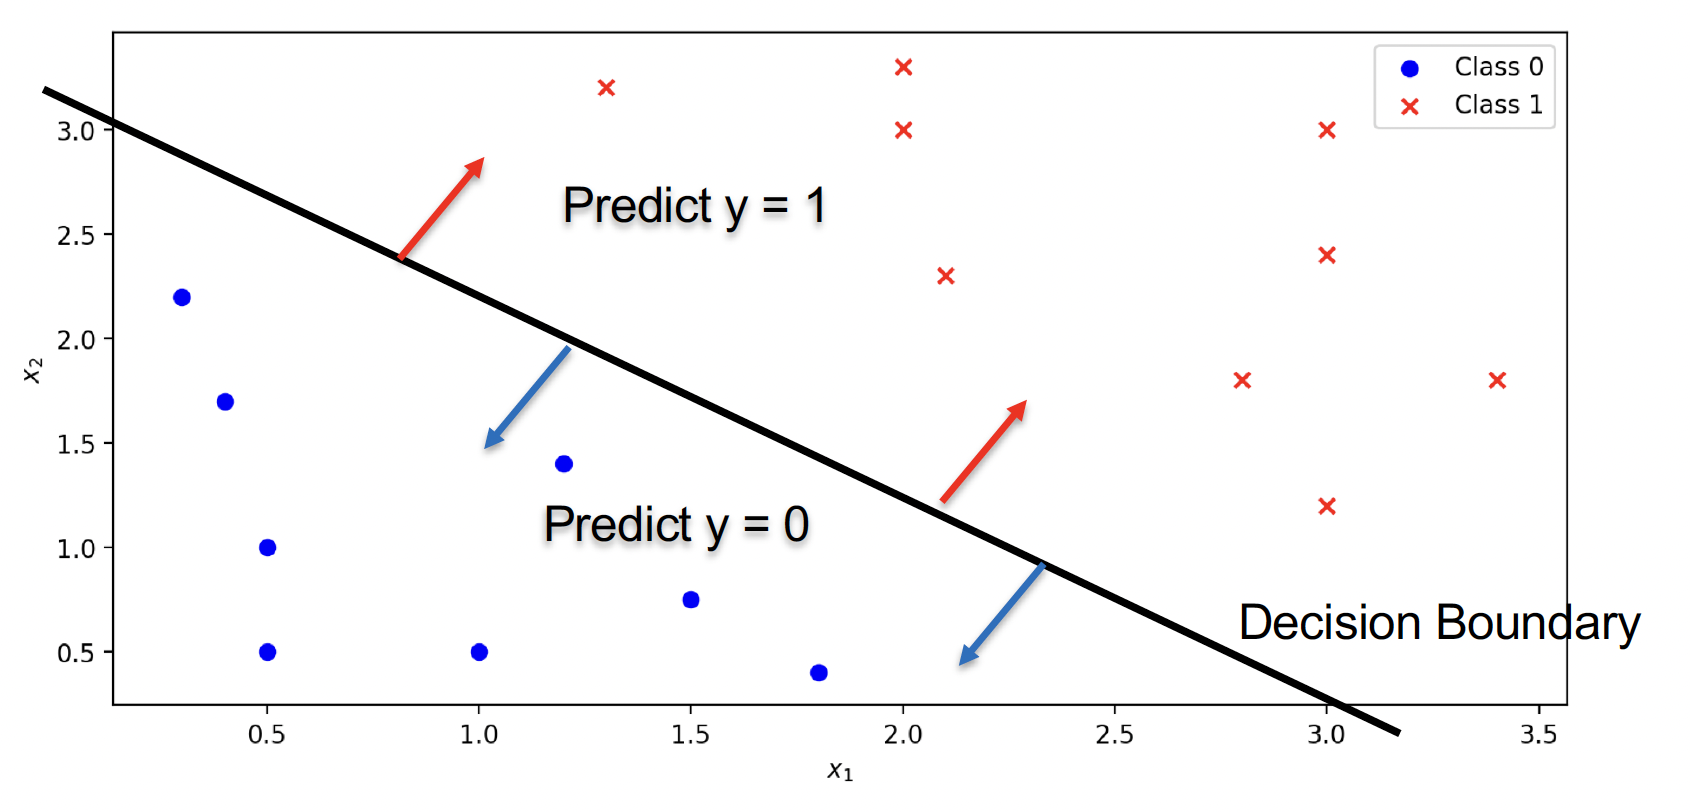

### Unsupervised Machine Learning
 
Models do not require labeled data


The model searches for a structure inherent in the data and provides the best possible structural representation for a given
given X.


**Clustering**

Given a set of data sets, each of which has a set of attributes, and a similarity measure between them, find clusters where:
- Data points in the same cluster are similar to each other.
- Data points in separate clusters are less similar to each other (e.g. market segmentation).


Sample algorithms:

- k-means
 
k-means consists of two steps:

1. the first step is cluster assignment.

2. the second step is the shifting of the centroids.

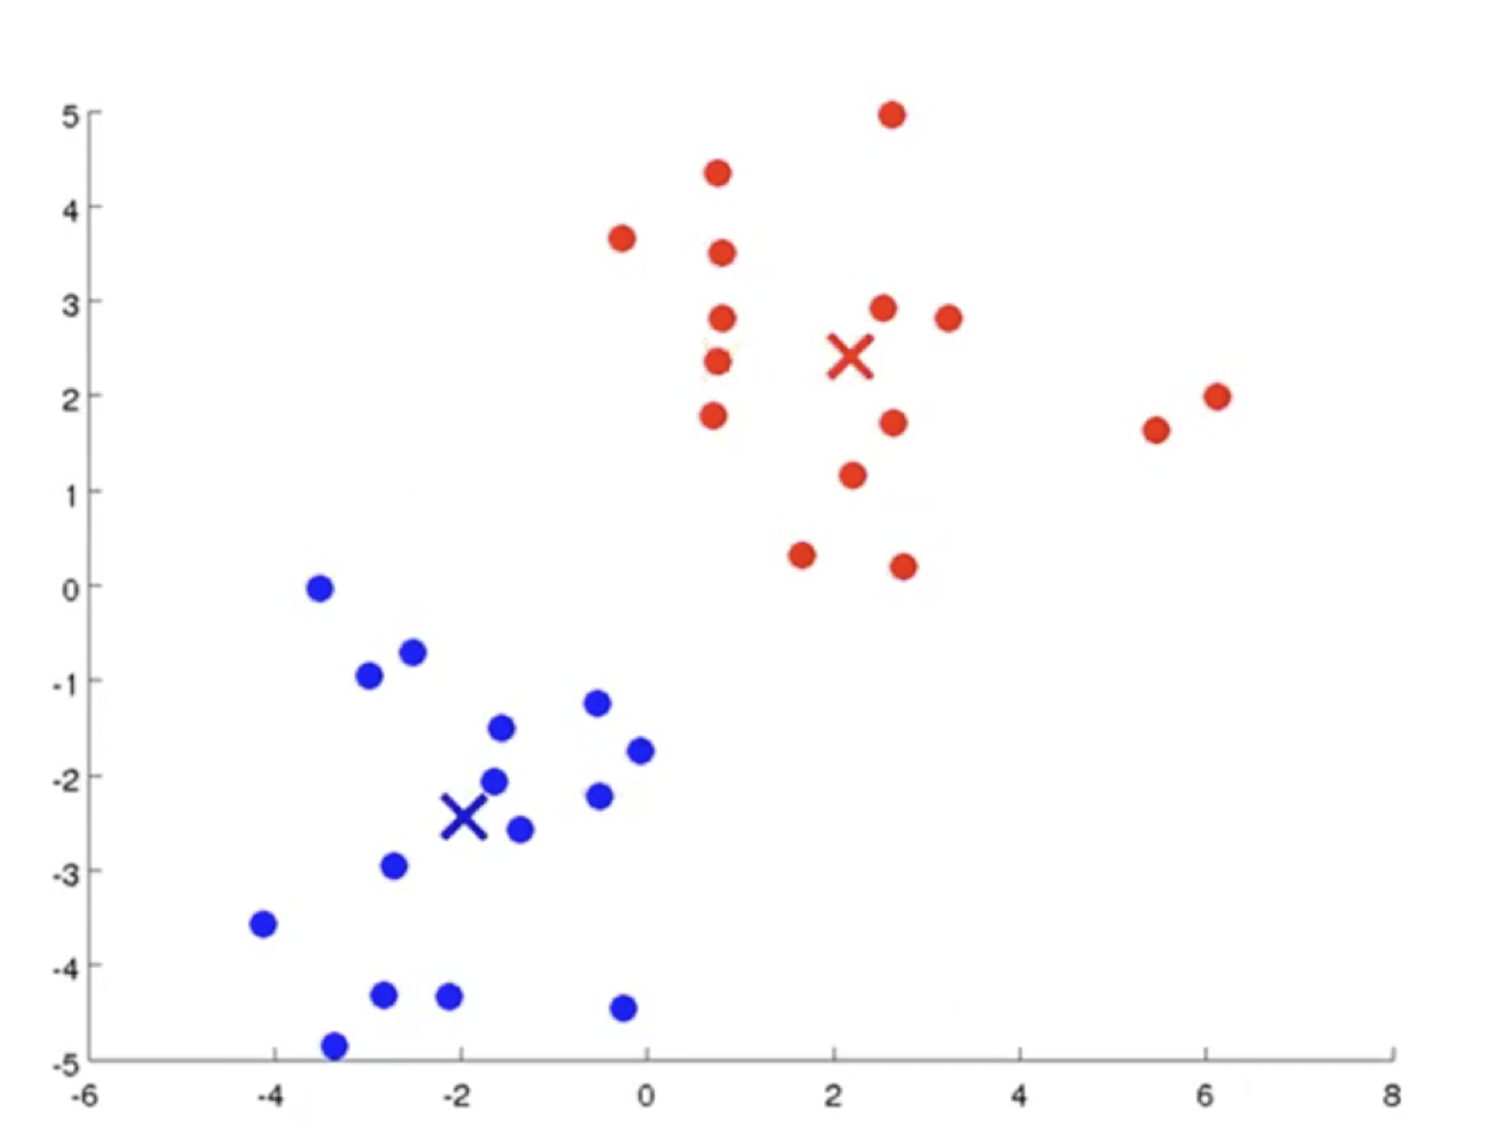

**Dimensionality reduction**
- Reduction of the number of features in vectors without losing too much information.
- Projection of features from a high dimensional space into a space with fewer dimensions \.
E.g., reduction of the document vector containing the number of individual words in a document.

- Sample Algorithm/Method: Principal Component Analysis (PCA)

### Typical Model Learning Experiment Design

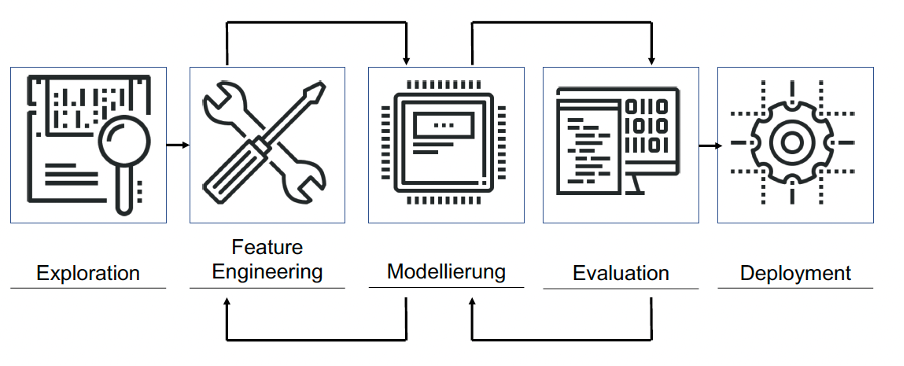

**Data**.

To show the typical ML workflow, we use the golf.csv dataset. The dataset contains several features related to weather and the *target variable* "play", which indicates whether someone should play golf or not under the given conditions.

In [12]:
# set the path to the file "golf.csv"

path='/Users/christofpeter/Desktop/01_OneDrive - Universität Mannheim/2023_2_STADS_ML_Kurs/Workshop_01/golf.csv'

#load data
import pandas as pd
golf = pd.read_csv(path)

### Exploration

- Plotting, Plotting, Plotting! -> see python course e.g. matplotlib or seaborn
- Simple uni- and bivariate statistics
- Statistical tests
- Consider expert knowledge


In [13]:
golf.head()

Outlook  Temperature  Humidity   Wind Play
0     sunny         85.0      85.0  False   no
1     sunny         80.0      90.0   True   no
2  overcast         83.0      78.0  False  yes
3      rain         70.0      96.0  False  yes
4      rain         68.0      80.0  False  yes

### Feature Engineering/Pre-processing
Many ML models benefit from preprocessing of the data

- Train, validation, test split
- Data cleaning
- Scaling - feature scaling is used to bring the distribution of variables into a more favorable shape
- Compute new features
- Forming transformations/interactions

First, we have to install scikit-learn, which we can do either with pip via "pip install scikit-learn" or with conda via "conda install scikit-learn"

"Outlook" and "Wind" columns have ordinal data, so we need to translate the values into numbers. We use OrdinalEncoder from sklearn for this.

In [21]:
import sklearn
# import preprocessing
from sklearn import preprocessing

# create the OrdinalEncoder
ordinal_encoder = preprocessing.OrdinalEncoder()

# preprocess the features Product and ZipCode
golf_ordinal = golf.copy()
golf_ordinal[['Outlook', 'Wind']] = ordinal_encoder.fit_transform(golf_ordinal[['Outlook', 'Wind']])

# show the results
golf_ordinal.head()

Outlook  Temperature  Humidity  Wind Play
0      2.0         85.0      85.0   0.0   no
1      2.0         80.0      90.0   1.0   no
2      0.0         83.0      78.0   0.0  yes
3      1.0         70.0      96.0   0.0  yes
4      1.0         68.0      80.0   0.0  yes

In [19]:
# create the normaliser
scaler = preprocessing.MinMaxScaler()

# preprocess the features ItemsBought and ItemsReturned
golf_min_max = golf_ordinal.copy()
golf_min_max[['Temperature', 'Humidity']] = scaler.fit_transform(golf_min_max[['Temperature', 'Humidity']])

# show the results
display(golf_min_max.head())

Outlook  Temperature  Humidity  Wind Play
0      2.0     1.000000  0.645161   0.0   no
1      2.0     0.761905  0.806452   1.0   no
2      0.0     0.904762  0.419355   0.0  yes
3      1.0     0.285714  1.000000   0.0  yes
4      1.0     0.190476  0.483871   0.0  yes

In [20]:
from sklearn import preprocessing

# create a variable with the values of the target variable
golf_target = golf_min_max['Play']

# and remove it from the dataframe so it only contains the features that our model should use
golf_min_max = golf_min_max.drop(columns='Play')

# encode the target variable into a numeric value
label_encoder = preprocessing.LabelEncoder()
golf_target = label_encoder.fit_transform(golf_target)

display("Features:")
display(golf_min_max)
display("Target:")
display(golf_target)

'Features:'

Outlook  Temperature  Humidity  Wind
0       2.0     1.000000  0.645161   0.0
1       2.0     0.761905  0.806452   1.0
2       0.0     0.904762  0.419355   0.0
3       1.0     0.285714  1.000000   0.0
4       1.0     0.190476  0.483871   0.0
5       1.0     0.047619  0.161290   1.0
6       0.0     0.000000  0.000000   1.0
7       2.0     0.380952  0.967742   0.0
8       2.0     0.238095  0.161290   0.0
9       1.0     0.523810  0.483871   0.0
10      2.0     0.523810  0.161290   1.0
11      0.0     0.380952  0.806452   1.0
12      0.0     0.809524  0.322581   0.0
13      1.0     0.333333  0.483871   1.0

'Target:'

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

After preprocessing, we can split our data between training and testing data.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(golf_min_max, golf_target, test_size=0.2, random_state=42)
display(X_train)
display(X_test)
display(y_train)
display(y_test)

Outlook  Temperature  Humidity  Wind
12      0.0     0.809524  0.322581   0.0
5       1.0     0.047619  0.161290   1.0
8       2.0     0.238095  0.161290   0.0
2       0.0     0.904762  0.419355   0.0
1       2.0     0.761905  0.806452   1.0
13      1.0     0.333333  0.483871   1.0
4       1.0     0.190476  0.483871   0.0
7       2.0     0.380952  0.967742   0.0
10      2.0     0.523810  0.161290   1.0
3       1.0     0.285714  1.000000   0.0
6       0.0     0.000000  0.000000   1.0

Outlook  Temperature  Humidity  Wind
9       1.0     0.523810  0.483871   0.0
11      0.0     0.380952  0.806452   1.0
0       2.0     1.000000  0.645161   0.0

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

array([1, 1, 0])

### Modeling
- Selection of suitable algorithms
- Target Modeling
- Feature Selection


First, we train some of models: logistic regression, decision tree, and random forest.

In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression().fit(X_train, y_train)

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(X_train, y_train)

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train, y_train)

We use cross validation to choose the best model

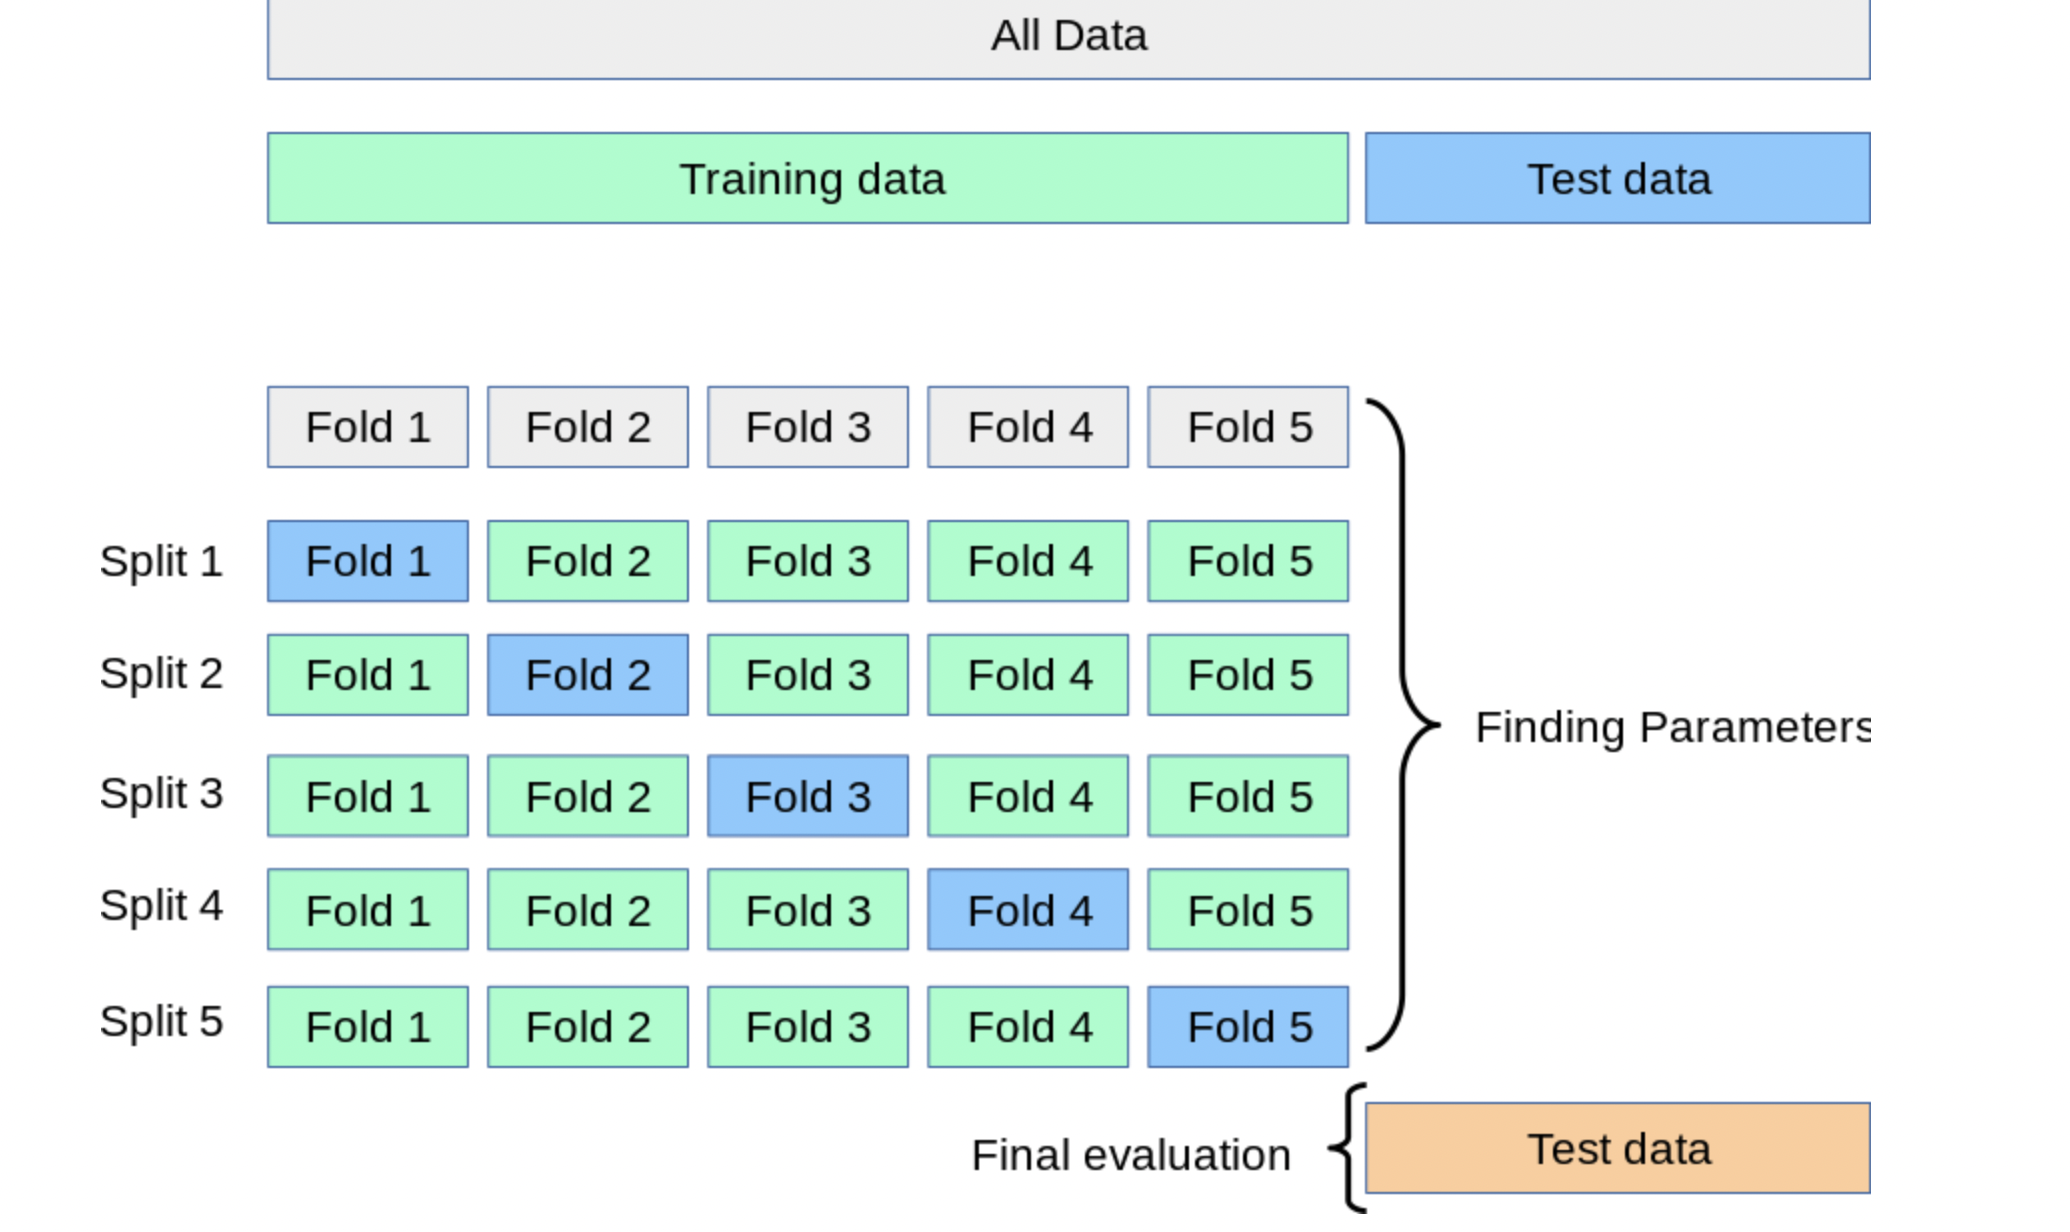

In [26]:
from sklearn.model_selection import cross_val_score
#score mean for logistic regression
scores_lr = cross_val_score(lr, X_train, y_train, cv=3)
print("Logistic regression achieves %0.2f accuracy with a standard deviation of %0.2f" % (scores_lr.mean(), scores_lr.std()))

#score mean for decision tree
scores_dt = cross_val_score(dt, X_train, y_train, cv=3)
print("Decision tree achieves %0.2f accuracy with a standard deviation of %0.2f" % (scores_dt.mean(), scores_dt.std()))

#score mean for random forest
scores_rf = cross_val_score(rf, X_train, y_train, cv=3)
print("Random forests achieves %0.2f accuracy with a standard deviation of %0.2f" % (scores_rf.mean(), scores_rf.std()))

Logistic regression achieves 0.72 accuracy with a standard deviation of 0.04
Decision tree achieves 0.53 accuracy with a standard deviation of 0.17
Random forests achieves 0.53 accuracy with a standard deviation of 0.17


Logistic regression seems to perform best, so we choose it as the best model.

### Evaluation
- Calculation of the important metrics
- Benchmarking of the different models
- Consultation with experts whether results are plausible


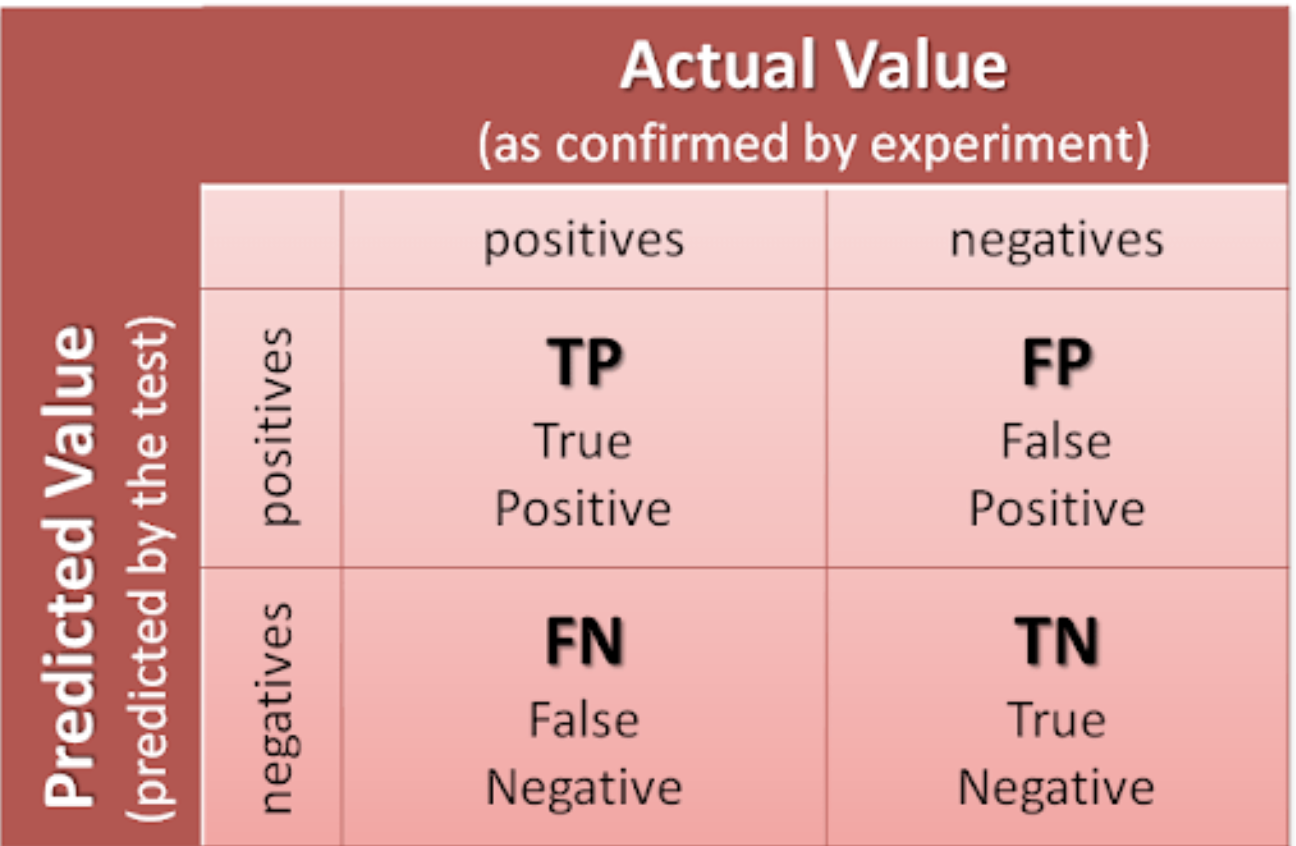

$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$

Accuracy is an easy metric to interpret, but it is meaningless for unbalanced data sets.


$Precision = \frac{TP}{TP+FP}$

Precision determines whether the retrieved results are all relevant.

$Recall = \frac{TP}{TP+FN}$

Recall determines whether all correct results were retrieved from the ML model.

$F1-score = \frac{2*Precision*Recall}{Precision+Recall}$

F1-score is the harmonic mean of Precision and Recall

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_predicted_lr=lr.predict(X_test)
display(y_test)
display(y_predicted_lr)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predicted_lr))
print()

print("Accuracy: {}".format(accuracy_score(y_test, y_predicted_lr)))

array([1, 1, 0])

array([1, 1, 1])

Confusion Matrix:
[[0 1]
 [0 2]]

Accuracy: 0.6666666666666666


### Deployment
- Persistence of the trained model
- Product deployment of the model
- Integrated in application, interfacing via API, batch job



## Additional exercise

The german.csv file contains the German credit data with over 20 variables and the classification of whether an applicant is considered a good or bad credit risk for 1000 credit applicants. A predictive model developed based on this data is designed to help a bank manager decide whether to approve a loan to a potential applicant based on his or her profile.

Your task is:
1. upload the data into the notebook. 
2. visualize the distribution of the classification.
3. perform data preprocessing so that you can train a machine learning model on this data.
4. split the data between training and testing data.
5. apply different classification algorithms on the data and determine the best algorithm.
Evaluate the best model using different metrics and argue which metric is best suited for this data set.

In [28]:
import pandas as pd
credit_data=pd.read_csv('/Users/christofpeter/Desktop/01_OneDrive - Universität Mannheim/2023_2_STADS_ML_Kurs/Workshop_01/german.csv',sep=';')

(array([300.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 700.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

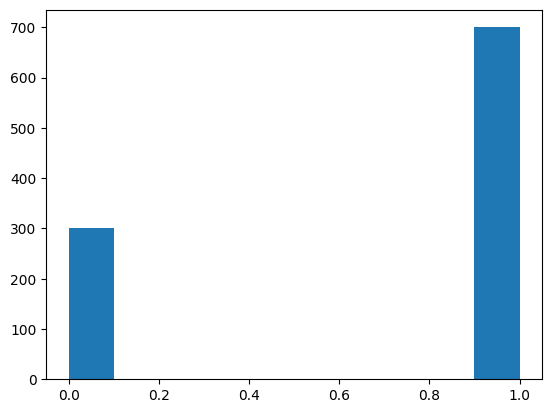

In [10]:
import matplotlib.pyplot as plt
plt.hist(credit_data['Creditability'])

In [29]:
#scale data, but onlty these columns that do not contain categories

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

credit_data[['Duration_of_Credit_monthly','Credit_Amount','Length_of_current_employment','Duration_in_Current_address', 'Age_years']] = scaler.fit_transform(credit_data[['Duration_of_Credit_monthly','Credit_Amount','Length_of_current_employment','Duration_in_Current_address', 'Age_years']])

In [30]:
#inspect data after preprocessing
display(credit_data)

Creditability  Account_Balance  Duration_of_Credit_monthly  \
0                1                1                    0.205882   
1                1                1                    0.073529   
2                1                2                    0.117647   
3                1                1                    0.117647   
4                1                1                    0.117647   
..             ...              ...                         ...   
995              0                1                    0.294118   
996              0                1                    0.294118   
997              0                4                    0.250000   
998              0                2                    0.117647   
999              0                1                    0.382353   

     Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                    4        2       0.043964   
1                                    4        0       0.140255   
2                                    2        9       0.032519   
3                                    4        0       0.103004   
4                                    4        0       0.105700   
..                                 ...      ...            ...   
995                                  2        3       0.095576   
996                                  2        0       0.112964   
997                                  4        0       0.683944   
998                                  2        3       0.342137   
999                                  2        2       0.335644   

     Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                       1                          0.25                    4   
1                       1                          0.50                    2   
2                       2                          0.75                    2   
3                       1                          0.50                    3   
4                       1                          0.50                    4   
..                    ...                           ...                  ...   
995                     1                          0.50                    2   
996                     1                          1.00                    4   
997                     5                          1.00                    4   
998                     5                          0.00                    2   
999                     5                          1.00                    4   

     Sex_Marital_Status  ...  Duration_in_Current_address  \
0                     2  ...                     1.000000   
1                     3  ...                     0.333333   
2                     2  ...                     1.000000   
3                     3  ...                     0.333333   
4                     3  ...                     1.000000   
..                  ...  ...                          ...   
995                   3  ...                     1.000000   
996                   3  ...                     0.000000   
997                   3  ...                     1.000000   
998                   3  ...                     0.000000   
999                   3  ...                     1.000000   

     Most_valuable_available_asset  Age_years  Concurrent_Credits  \
0                                2   0.035714                   3   
1                                1   0.303571                   3   
2                                1   0.071429                   3   
3                                1   0.357143                   3   
4                                2   0.339286                   1   
..                             ...        ...                 ...   
995                              1   0.035714                   3   
996                              1   0.464286                   3   
997                              4   0.196429                   3   
998                    

In [31]:
#extract the target variable
target=credit_data['Creditability']

In [32]:
#drop the target variable column
credit_data=credit_data.drop(columns=['Creditability'])

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(credit_data, target, test_size=0.2, random_state=42, stratify=target)

In [34]:
#various algorithms
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression().fit(X_train, y_train)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train, y_train)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)

/Users/christofpeter/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
from sklearn.model_selection import cross_val_score
#score mean for logistic regression
scores_lr = cross_val_score(lr, X_train, y_train, cv=10)
print("Logistic regression achieves %0.2f accuracy with a standard deviation of %0.2f" % (scores_lr.mean(), scores_lr.std()))

#score mean for decision tree
scores_dt = cross_val_score(dt, X_train, y_train, cv=10)
print("Decision tree achieves %0.2f accuracy with a standard deviation of %0.2f" % (scores_dt.mean(), scores_dt.std()))

#score mean for random forest
scores_rf = cross_val_score(rf, X_train, y_train, cv=10)
print("Random forests achieves %0.2f accuracy with a standard deviation of %0.2f" % (scores_rf.mean(), scores_rf.std()))

#score mean for naive bayes
scores_gnb = cross_val_score(gnb, X_train, y_train, cv=10)
print("Naive Bayes achieves %0.2f accuracy with a standard deviation of %0.2f" % (scores_gnb.mean(), scores_rf.std()))

/Users/christofpeter/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/christofpeter/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Logistic regression achieves 0.76 accuracy with a standard deviation of 0.04
Decision tree achieves 0.68 accuracy with a standard deviation of 0.06
Random forests achieves 0.75 accuracy with a standard deviation of 0.03
Naive Bayes achieves 0.70 accuracy with a standard deviation of 0.03


Logistic regression and random forests seems to perform best.

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score



y_predicted_lr=lr.predict(X_test)
display(y_test)
display(y_predicted_lr)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predicted_lr))
print()

print("Accuracy: {}".format(accuracy_score(y_test, y_predicted_lr)))
print("Precision: {}".format(precision_score(y_test, y_predicted_lr)))
print("Recall: {}".format(recall_score(y_test, y_predicted_lr)))
print("F1-score: {}".format(f1_score(y_test, y_predicted_lr)))



733    1
536    1
445    1
310    1
861    0
      ..
106    1
331    1
121    1
244    1
538    1
Name: Creditability, Length: 200, dtype: int64

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1])

Confusion Matrix:
[[ 29  31]
 [ 15 125]]

Accuracy: 0.77
Precision: 0.8012820512820513
Recall: 0.8928571428571429
F1-score: 0.8445945945945946


This data set is unbalanced, so Accuracy is not a good metric to evaluate the model. Every false positive would cost a bank money (a loan that will probably not be paid off), so Precision is the best metric. With Precision, we measure how many traps that were classified positive are really positive.